# Quickstart

In [3]:
import torch

In [6]:
!pip install torchvision

  Using cached torchvision-0.19.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.0 kB)
  Using cached torch-2.4.1-cp312-cp312-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached triton-3.0.0-1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.3 kB)
Using cached torchvision-0.19.1-cp312-cp312-manylinux1_x86_64.whl (7.0 MB)
Using cached torch-2.4.1-cp312-cp312-manylinux1_x86_64.whl (797.0 MB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached triton-3.0.0-1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (209.5 MB)
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 8.9.2.26
    Uninstalling nvidia-cudnn-cu12-8.9.2.26:
      Successfully uninstalled nvidia-cudnn-cu12-8.9.2.26
  Attempting uninstall: torch
    Found existing installation: torch 2.3.1
    Uninstalling torch-2.3.

In [7]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

AttributeError: module 'torch.library' has no attribute 'register_fake'

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
batch_size = 64

# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

In [ ]:
# Creating Models
'''
    To define a neural network in PyTorch, we create a class that inherits from the `nn.Module`. We define the layers of the network in the __init__ function and specify how data will pass through
    the network in the forward function. To accelerate operations in the neural network, we move it to the GPU of MPS if available.
'''

In [ ]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

In [ ]:
# Optimizing the Model Parameters
## To train a model, we need a loss function and an optimizer.

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parametes(), lr=1e-3)

In [ ]:
# In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model's parameters.
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
        loss, current = loss.item(), (batch + 1) * len(X)
        print(f"loss: {loss:>7f} [{current:>5d} / {size:>5d}]")

In [ ]:
# We also check the model's performance against the test dataset to ensure it is learning
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argumax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct) :> 0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
'''
    The training process is conducted over several iterations (epochs). During each epoch, the model learns parameters to make better predictions. We print the model's accuracy and 
    loss at each epoch; we'd like to see the accuracy increase and the loss decrease with every epoch.
'''

epochs = 5
for t in range(epochs):
    print(f"Epochs {t+1}\n---------------------------------------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

In [ ]:
# Saving Models
# A common way to save a model is to serialize the internal state dictionary (containing the model parameters).

torch.save(model.state_dict(), "model.pth")
print("Saved Pytorch Model State to model.pth")

In [ ]:
# Loading Models
# The process for loading a model includes re-creating the model structure and loading the state dictionary into it.
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

In [ ]:
# model evaluation follows

# Tensors

In [ ]:
import torch
import numpy as np

## Initializing a Tensor
Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**  
Tensors can be created directly from data. The data type is automatically inferred.

In [ ]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

## From a NumPy array
Tensors can be created from NumPy arrays (and vice versa -see Bridge with NumPy).

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

## From another tensor:
The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"One Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

## With random or constant values:
'shape' is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the input tensor.

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

# Attributes of a Tensor
Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of the tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

# Operations on Tensors  
Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are described in the pytorch documentation.
Each of these operations can be run on the GPU (at typically higher speeds than on a CPU).
By default, tensors are created on the CPU. We need to explicitly move tensors to GPU using .to method (after checking for GPU availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!

In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

## Standard numpy-like indexing and slicing

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:, 1] = 0
print(tensor)

**Joining tensors** You can use `torch.cat` to concatenate a sequence of tensors along a given dimension. See also `torch.stack`, another tensor joining operator that
is subtly different from `torch.cat`

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

In [ ]:
t2 = torch.cat([tensor, tensor, tensor], dim=0)
print(t2)

## Arithmetic operations

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor

y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

In [ ]:
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

In [ ]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

## **Single-element tensors** 
If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python
numerical value using `item`

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

In [ ]:
tes = torch.ones(4, 4, dtype=torch.int8)
print(tes)

In [ ]:
# try with the single-element tensors
tes_set = tes.sum()
print(tes_set)

In [ ]:
tes_set = tes_set.item()
print(tes_set)

In [ ]:
print(type(tes_set))

## **In-place operations**  
Operations that store the result into the operand are called in-place. They are denoted by a _sufix. For example: `x.copy_(y)`, `x.t_()`, will change `x`.

In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

> **Note**:
> In-place operations save some memory, but can be problematic when computing derivatives because of an immediate  loss of history. Hence, their use is discouraged.


## Bridge with NumPy
Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other

## Tensor to NumPy array

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

In [ ]:
# A change in the tensor reflects in the NumPy array.

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

## NumPy array to Tensor

In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

**Changes in the NummPy array reflects in the tensor**

In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

## Practice tensors

In [ ]:
# creating tensors
# From value
val = 12
tensor_from_value = torch.tensor(val)
print(val)
print(tensor_from_value)

In [ ]:
# Tensor of ones
tensor_of_ones = torch.ones(2, 2)
print(tensor_of_ones)

In [ ]:
# Tensor of ones with datatype
tensor_of_ones_v2 = torch.ones(2, 2, dtype=torch.int16)
print(tensor_of_ones_v2)

In [ ]:
# Tensor of random values between 0 and 1
tensor_random = torch.rand(2, 3)
print(tensor_random)

# Datasets and DataLoaders  
---

## Loading a Dataset  
Here is an example of how to load the **Fashion-MNIST** dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training samples and 10,000 test samples. Each example comprises a 28x28 grayscale image and an associated label from one of 10 classes.

We load the **FashionMNIST Dataset** with the following parameters:  
* `root` is the path where the train/test data is stored,
* `train` specifics training or test dataset,
* `download=True` downloads the data from the internet if it's not available at `root`,
* `transform` and `target_transform` specify the feature and the label transformations

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterating and Visualizing the Dataset  
We can index `Datasets` manually like a list: `training_data[index]`. We use matplotlib to visualize some samples in our training data.

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trowser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplots(rows, cols, i)
    plt.title(labels_map[lable])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files  
A custom Dataset class must implement three functions: *__init__, __len__, and __getitem__*. Take a look at this implementations; the FashionMNIST images are stored in a directory `img_dir`, and their labels are stored separately in a CSV file `annotations_file`.  

In the next sections, we'll breakdown what's happening in each of these functions.

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## `__init__`
The '__init__' function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms, this will be covered in more detail in the next section.

In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

## `__len__`  
The '__len__' function returns the number of samples in our dataset.  
Example: 

In [ ]:
def __len__(self):
    return len(self.img_labels)

## `__getitem__`  
The __getitem__ function loads and returns a sample from the dataset at the given `idx`. Based on the index, it identifies the image's location on disk, converts that to a tensor using the `read_image`, retrieves the corresponding label from the csv data in `self.img_labels`, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in tuple.

In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

## Preparing your data for training with DataLoaders

The `Dataset` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's `multiprocessing` to speed up data retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an easy API.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader  
We have loaded that dataset into the `DataLoader` and can iterate through the dataset as needed. Each iteration below returns a batch of `train_features` and `train_labels` (containing `batch_size=64` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order.)

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## torch.utils.data
At the heart of PyTorch data loading utility is the `torch.utils.data.DataLoader` class. It represents a Python iterable over a dataset, with support for:  
- map-style and iterable-style datasets,
- customizing data loading order,
- automatic batching,
- single and multi-process data loading,
- automatic memory pinning.

These options are configured by the constructor arguments of a `DataLoader`, which has signature

```Python
DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,  
            batch_sampler=None, num_workers=0, collate_fn=None,  
            pin_memory=False, drop_last=False, timeout=0,  
            worker_init_fn=None, x, prefetch_factor=2,  
            peristent_workers=False)
```

# Transforms

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10,
                                                 dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## ToTensor  
`ToTensor` converts a PIL image or NumPy `ndarray` into a `FloatTensor`. and scales the image's pixel intensity values in the range[0., 1.]

## Lambda Transforms
Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls `scatter_` which assigns a `value=1` on the index as given by the label `y`.

In [4]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)
)

# Build the Neural Network

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Get Device for Training
We want to be able to train our model on a hardware accelerator like the GPU or MPS, if available. Let's check to see if `torch.cuda` or `torch.backends.mps` are available, otherwise we use the CPU

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
)

## Define the class
We define our neural network by subclassing `nn.Module`, and initialize the neural network layers in `__init__`. Every `nn.Module` subclass implements the operations the operations on input data in the `forward` method.

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of `NeuralNetwork`, and move it to the `device`, and print its structure

In [ ]:
model = NeuralNetwork().to(device)
print(model)

To use the model, we pass it the input data. This executes the model's `forward`, along with some `background operations`. Do not call `model.forward()` directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the `nn.Softmax` module.

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = mm.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

## Model Layers
Let's break down the layers of the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network

In [2]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

## nn.Flatten
We initialize the `nn.Flatten` layer to convert each 2D 28x28 image into a contagious array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

## nn.ReLU

# Distributed and Parallel Training Tutorial
There are a few ways you can perform distributed training in PyTorch with each method having their advantages in certain use cases:
* DistributedDataParallel (DDP)
* Fully Shared Data Parallel (FSDP)
* Tensor Parallel (TP)
* Device Mesh
* Remote Procedure Call (RPC) distributed training
* Custom Extensions

## Getting started with Distributed Data Parallel
**Prerequisities:**
* PyTorch Distributed Overview
* DistributedDataParallel API documents
* DistributedDataParallel notes

## Pytorch Distributed Overview
This is the overview page for the `torch.distributed` package. The goal of this page is to categorize documents into different topics and briefly describe each of them. If this is your first time building distributed training applications using PyTorch, it is recommended to use this document to navigate to the technology that can best serve your case.

## Introduction
The PyTorch Distributed library includes a collective of parallelism modules, a communications layer and infrastructure for lauching and debugging large training jobs.

## Parallelism APIs
These Parallelism Modules offer high -level functionality and compose with existing models:
- Distributed Data-Parallel (DDP)
- Fully Sharded Data-Parallel Training (FSDP)
- Tensor Parallel (TP)
- Pipeline Parallel (PP)

## Sharding primitives
`DTensor` and `DeviceMesh` are primitives used to build parallelism in terms of sharded or replicated tensors on N-dimensional process groups.
* `DTensor` represents a tensor that is sharded and/or replicated, and communicates automatically to reshard tensors as needed by operations.
* `DeviceMesh` abstracts the accelerator device communicators into a multi-dimensional array, which manages the underlying `ProcessGroup` instances for collective communications in multi-dimensional parallelisms. Try out `Device Mesh Recipe` to learn more.

## Communications APIs
The `PyTorch distributed communication layer (C10D)` offers both collective communication APIs (e.g., `all_reduce` and `all_gather`) and P2P communication APIs (e.g., `send` and `isend`), which are used under the hood in all of parallelism implementations. `Writing Distributed Applications with PyTorch` shows examples of using c10d communication APIs.

## Launcher
`torchrun` is a widely-used launcher script, which spawns processes on the local and remote machines for running distributed PyTorch programs.

## Applying Parallelism To Scale Your Model
Data Parallelism is a widely adopted single-program multiple-data training paradigm where the model is replicated on every model replica computes local gradients for a different set of input data samples, gradients are averaged within the data-parallel communicator group before each optimizer step.

Model Parallelism techniques (or sharded Data Parallelism) are required when a model doesn't fit in GPU, and can be combined together to form multi-dimensional (N-D) parallelism techniques.

When deciding what parallelism techniques to choose for your model, use these common guidelines:

1. Use `DistributedDataParallel (DDP)`, if your model fits in a single GPU but you want to easily scale up training using multiple GPUs.
   * Use `torchrun` to launch multiple pytorch processes if you are using more than one node.
2. Use `FullyShardedDataParallel (FSDP) ` when your model cannot fit on one GPU.
3. Use `Tensor Parallel (TP)` and/or `Pipeline Parallel (PP)` if you reach scaling limitations with FSDP.

# Getting Started with DeviceMesh

Prerequisites:
* [Distributed Communication Package](https://pytorch.org/docs/stable/distributed.html) - `torch.distributed`

Setting up distributed communicators, i.e. NVIDIA Collective Communication Library (NCCL) communicators, for distributed training can pose a signifant challenge. For workloads where users need to compose different parallelisms, users would need to manually set up and manage NCCL communicators (for example, `processGroup`) For each parallism solution. This process could be complicated and susceptible to errors.
`DeviceMesh` can simplify this process, making it more manageable and less prone to errors.

## What is DeviceMesh
`DeviceMesh` is a higher level abstraction that manages `ProcessGroup`. It allows users to effortlessly create inter-node and intra-node process groups without worrying about to set up ranks correctly for different sub process groups. Users can also easily manage the underlying process_groups/devices for multi-dimensional parallelism via `DeviceMesh`

## Why DeviceMesh is Useful
DeviceMesh is useful when working with multi-dimensional parallelism (i.e. 3-D parallel) where parallelism composability is required. For example, when your parallelism solutions require both communication across hosts and within each host. The image above shows that we can create a 2D mesh that connects the devices within each host, and connects each device with its counterpart on the other hosts in a homogenous setup

Without DeviceMesh, users would need to manually set up NCCL communicators, cuda devices on each process before applying any parallelism, which could be quite complicated. The following code snippet illustrates a hybrid sharding 2-D Parallel pattern setup without `DeviceMesh`. First, we need to manually calculate the shard group and replicate group. Then, we need to assign the correct shard and replica group to each rank.

In [1]:
import os

import torch
import torch.distributed as dist

In [4]:
# Understand world topology
rank = int(os.environ["RANK"])
world_size = int(os.environ["WORLD_SIZE"])
print(f"Running example on {rank=} in a world with {world_size=}")

In [5]:
# Create process groups to manage 2-D like parallel pattern
dist.init_process_group("nccl")
torch.cuda.set_device(rank)

NameError: name 'dist' is not defined

In [10]:
# Create shard groups (e.g. (0, 1, 2, 3), (4, 5, 6, 7))
# and assign the correct shard group to each rank
num_node_devices = torch.cuda.device_count()
shard_rank_lists = list(range(0, num_node_devices // 2)),
list(range(num_node_devices // 2, num_node_devices))
shard_groups = (
    dist.new_group(shard_rank_lists[0]),
    dist.new_group(shard_rank_lists[1]),
)

# Create replicate groups (for example, (0, 4), (1, 5), (2, 6), (3, 7))
# and assign the correct replica group to each rank
current_replicate_group = None
shard_factor = len(shard_rank_lists[0])
for i in range(num_node_devices // 2):
    replica_group_ranks = list(range(i, num_node_devices, shard_factor))
    replica_group = dist.new_group(replica_group_ranks)
    if rank in replicate_group_ranks:
        current_replicate_group = replicate_group

To run the above code snippet, we can leverage PyTorch Elastic. Let’s create a file named 2d_setup.py. Then, run the following torch elastic/torchrun command.

`torchrun --nproc_per_node=8 --rdzu_id=100 --rdzu_endpoint=localhost:29400 2d_setup.py`

Let's create a file named `2d_setup_with_device_mesh.py`. Then, run the following `torch elastic/torchrun` command.

```bash
torchrun --nproc_per_node=8 2d_setup_with_device_mesh.py
```

## How to use DeviceMesh with HSDP
Hybrid Sharding Data Parallel(HSDP) is 2D strategy to perform FSDP within a host and DDP across hosts.

Let's see an example of how DeviceMesh can assist with applying HSDP to your model with a simple setup. With DeviceMesh, users would not need to manually create and manage shard group and replicate group.

In [1]:
import torch
import torch.nn as nn

from torch.distributed.device_mesh import init_device_mesh
from torch.distributed.fsdp import FullyShardedDataParallel as FSDP, ShardingStrategy

In [3]:
class ToyModel(nn.Module):
    def __init__(self):
        super(ToyModel, self).__init__()
        self.net1 = nn.Linear(10, 10)
        self.relu = nn.RELU()
        self.net2 = nn.Linear(10, 5)

    def forward(self, x):
        return self.net2(self.relu(self.net1(x)))

# HSDP: MeshShape(2, 4)
mesh_2d = init_device_mesh("cuda", (2, 4))
model = FSDP(
    ToyModel(), device_mesh=mesh_2d,
    sharding_strategy=ShardingStrategy.HYBRID_SHARD
)

Let's create a file named `hsdp.py`. Then, run the following `torch elastic/torchrun` command.

```bash
torchrun --nproc_per_node=8 hsdp.py
```

## How to use DeviceMesh for your custom parallel solutions

When working with large scale training, you might have more complex custom parallel training composition. For example, you may need to slice out submeshes for different parallelism solutions. DeviceMesh allows users to slice child mesh from the parent mesh and re-use the NCCL communicators already created when the parent mesh is initialized.

# Training a Classifier

## Dataset used: `cifar10`

## We will do the following steps in order
1. Load and normalize the CIFAR10 training and test datasets using `torchvision`
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

## 1. Load and normalize CIFAR10
Using `torchvision`, it's extremely easy to load CIFAR10

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range \[0, 1]. We transform them to Tensors of normalized range \[-1, 1].

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [02:40<00:00, 1063619.21it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images for fun.

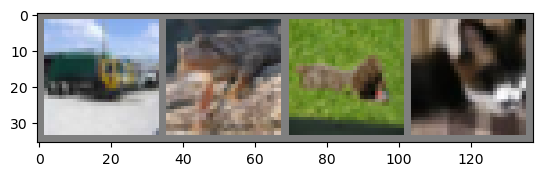

truck frog  dog   cat  


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show as image

def imshow(img):
    img = img / 2 + 0.5    # unnormalize
    nping = img.numpy()
    plt.imshow(np.transpose(nping, (1, 2, 0)))
    plt.show()

# get some random training images
detaiter = iter(trainloader)
images, labels = next(detaiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 2. Define a Convolutional Neural Network
Copy the neural network from the Neural Networks section before and modify it to take 3-channel images (instead of 1-channel images as it was defined)

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [9]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

# Define a Loss function and optimizer
Let's use a Classification Cross-Entropy loss and SGD with momentum.

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train the network
This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [11]:
for epoch in range(2):   # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.212
[1,  4000] loss: 1.888
[1,  6000] loss: 1.684
[1,  8000] loss: 1.582
[1, 10000] loss: 1.527
[1, 12000] loss: 1.463
[2,  2000] loss: 1.391
[2,  4000] loss: 1.357
[2,  6000] loss: 1.331
[2,  8000] loss: 1.323
[2, 10000] loss: 1.299
[2, 12000] loss: 1.265
Finished Training


Let's quickly save our trained model

In [12]:
PATH = './cifar_net.path'
torch.save(net.state_dict(), PATH)

## 5. Test the network on the test data
We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

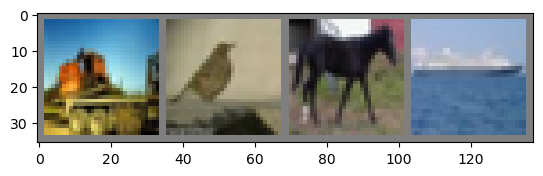

GroundTruth:  truck bird  horse ship 


In [14]:
detailer = iter(testloader)
images, labels = next(detaiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Next, let's load back in our saved model (note: saving and re-loading the model wasn't necessary here, we only did it to illustrate how to do so):

In [15]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above are:

In [16]:
outputs = net(images)

The outputs are energies for the 10 classes. The higher the energy for a class, the more the network thinks that the image is of the particular class. So, let's get the index of the highest energy:

In [17]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                                for j in range(4)))

Predicted:  bird  bird  horse plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.

In [18]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total}%')

Accuracy of the network on the 10000 test images: 55%


That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [21]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 64.8 %
Accuracy for class: car   is 72.4 %
Accuracy for class: bird  is 43.2 %
Accuracy for class: cat   is 42.6 %
Accuracy for class: deer  is 47.1 %
Accuracy for class: dog   is 39.4 %
Accuracy for class: frog  is 76.2 %
Accuracy for class: horse is 55.6 %
Accuracy for class: ship  is 66.1 %
Accuracy for class: truck is 51.4 %


Okay, so what is next?

How do we run these neural networks on the GPU?

## Training on GPU
Just like how you transfer onto the GPU, you transfer the neural net onto the GPU.
Let's first define our device as the first visible cuda device if we have CUDA available:

In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cpu


The rest of this section assumes that `device` is a CUDA device
Then these methods will recursively go over all modules and covert their parameters and buffers to CUDA tensors:

In [23]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Remember that you will have to send the inputd and targets at every step to the GPU too:

In [24]:
inputs, labels = data[0].to(device), data[1].to(device)

In [ ]:
import time

start = time